
Estadísticas de Distancia (distancia - cm):
Conteo                  63.000000
Promedio                72.301587
Desviación estándar     29.227492
Mínimo                   0.000000
25%                     73.000000
50% (Mediana)           77.000000
75%                     80.000000
Máximo                 210.000000
Name: distancia, dtype: float64

Estadísticas de Lluvia (lluvia - analógico):
Conteo                   63.000000
Promedio                973.079365
Desviación estándar     170.596137
Mínimo                  106.000000
25%                    1022.000000
50% (Mediana)          1022.000000
75%                    1023.000000
Máximo                 1023.000000
Name: lluvia, dtype: float64

Estadísticas de Aplausos (aplausos):
Conteo                 63.000000
Promedio                1.857143
Desviación estándar     3.084075
Mínimo                  0.000000
25%                     1.000000
50% (Mediana)           1.000000
75%                     1.000000
Máximo                 18.0

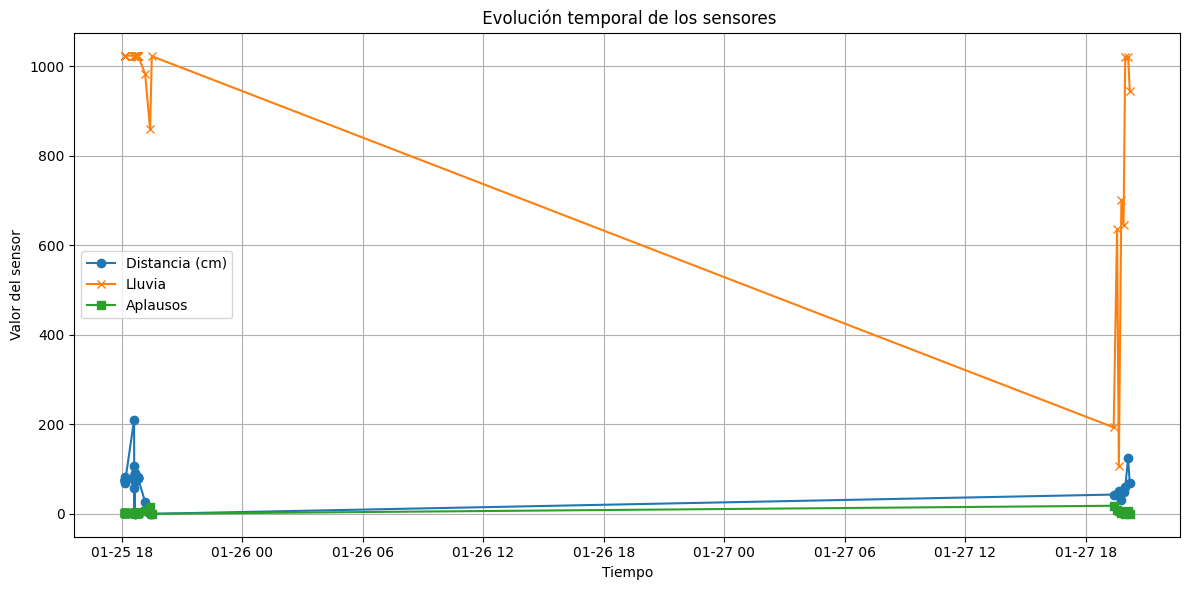


 Valores atípicos en Distancia: 16
                  created_at  distancia
10 2026-01-25 18:36:00+00:00        210
11 2026-01-25 18:36:30+00:00         58
12 2026-01-25 18:36:45+00:00        107
16 2026-01-25 18:37:45+00:00          0
17 2026-01-25 18:38:00+00:00         91
18 2026-01-25 18:38:15+00:00          0
52 2026-01-25 19:08:51+00:00         27
53 2026-01-25 19:23:57+00:00          0
54 2026-01-25 19:28:57+00:00          0
55 2026-01-27 19:23:43+00:00         43
56 2026-01-27 19:33:50+00:00         42
57 2026-01-27 19:39:09+00:00         51
58 2026-01-27 19:46:43+00:00         31
59 2026-01-27 19:53:13+00:00         49
60 2026-01-27 19:58:13+00:00         59
61 2026-01-27 20:06:46+00:00        124

Frecuencia de muestreo promedio: 2906.98 segundos

Matriz de correlación:
           distancia    lluvia  aplausos
distancia   1.000000  0.296206 -0.323563
lluvia      0.296206  1.000000 -0.694457
aplausos   -0.323563 -0.694457  1.000000


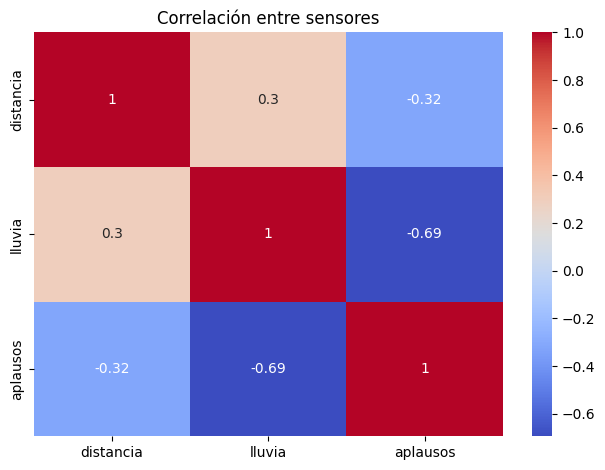

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos desde CSV
df = pd.read_csv(r"C:\Users\Alejandro\Downloads\feeds (2).csv")

# Convertir 'created_at' a formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

df = df.rename(columns={
    'field1': 'distancia',
    'field2': 'lluvia',
    'field3': 'aplausos'
})


# Estadísticas

print("\nEstadísticas de Distancia (distancia - cm):")
stats_dist = df['distancia'].describe()
stats_dist.index = ['Conteo', 'Promedio', 'Desviación estándar', 'Mínimo',
                    '25%', '50% (Mediana)', '75%', 'Máximo']
print(stats_dist)

print("\nEstadísticas de Lluvia (lluvia - analógico):")
stats_lluvia = df['lluvia'].describe()
stats_lluvia.index = ['Conteo', 'Promedio', 'Desviación estándar', 'Mínimo',
                      '25%', '50% (Mediana)', '75%', 'Máximo']
print(stats_lluvia)

print("\nEstadísticas de Aplausos (aplausos):")
stats_aplausos = df['aplausos'].describe()
stats_aplausos.index = ['Conteo', 'Promedio', 'Desviación estándar', 'Mínimo',
                        '25%', '50% (Mediana)', '75%', 'Máximo']
print(stats_aplausos)

#  Evolución temporal

plt.figure(figsize=(12, 6))
plt.plot(df['created_at'], df['distancia'], marker='o', label='Distancia (cm)')
plt.plot(df['created_at'], df['lluvia'], marker='x', label='Lluvia')
plt.plot(df['created_at'], df['aplausos'], marker='s', label='Aplausos')

plt.xlabel("Tiempo")
plt.ylabel("Valor del sensor")
plt.title(" Evolución temporal de los sensores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Detección de valores atípicos (Distancia)

Q1 = df['distancia'].quantile(0.25)
Q3 = df['distancia'].quantile(0.75)
IQR = Q3 - Q1

outliers_dist = df[
    (df['distancia'] < Q1 - 1.5 * IQR) |
    (df['distancia'] > Q3 + 1.5 * IQR)
]

print(f"\n Valores atípicos en Distancia: {len(outliers_dist)}")
print(outliers_dist[['created_at', 'distancia']])

# Frecuencia de muestreo

df_sorted = df.sort_values('created_at')
intervals = df_sorted['created_at'].diff().dropna()
avg_interval = intervals.mean()

print(f"\nFrecuencia de muestreo promedio: {avg_interval.total_seconds():.2f} segundos")

#  Correlaciones

print("\nMatriz de correlación:")
corr = df[['distancia', 'lluvia', 'aplausos']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación entre sensores")
plt.tight_layout()
plt.show()
